A shitty notebook created for my shitty workflow. Just to check which data is which. Only losers do this.

In [1]:
import nibabel as nib
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
# train_path1 = "/home/myi16/jsr_Y/new_data"
# train_path2 = "/home/myi16/jsr_Y/second_data"
train_path3 = "/home/myi16/jsr_Y/md4"
train_path4 = "/mnt/blackhole-data2/RadOnc_Brain/NonRigid_Training_CBCT"
name = '/018.npz'

Text(0.5, 1.0, 'Deformed MR of Runze')

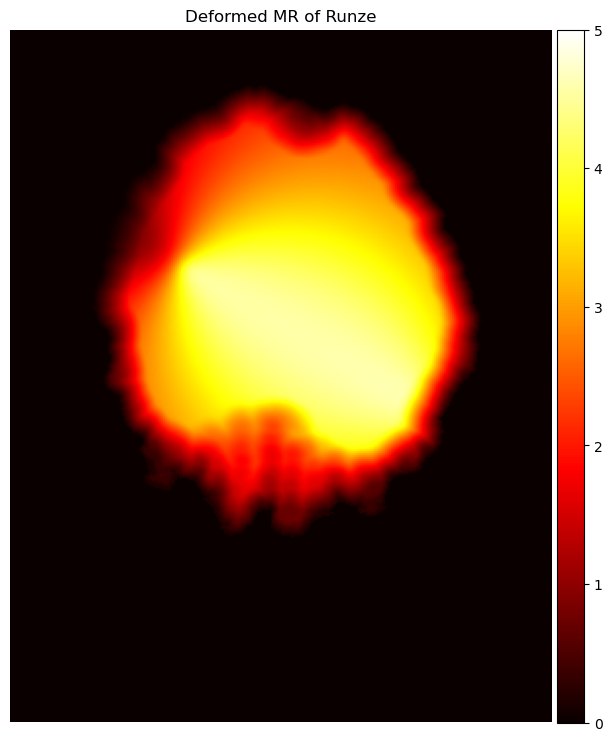

In [50]:
mr[0].shape

(128, 160, 128)

Text(0.5, 1.0, 'Deformed MR of Runze')

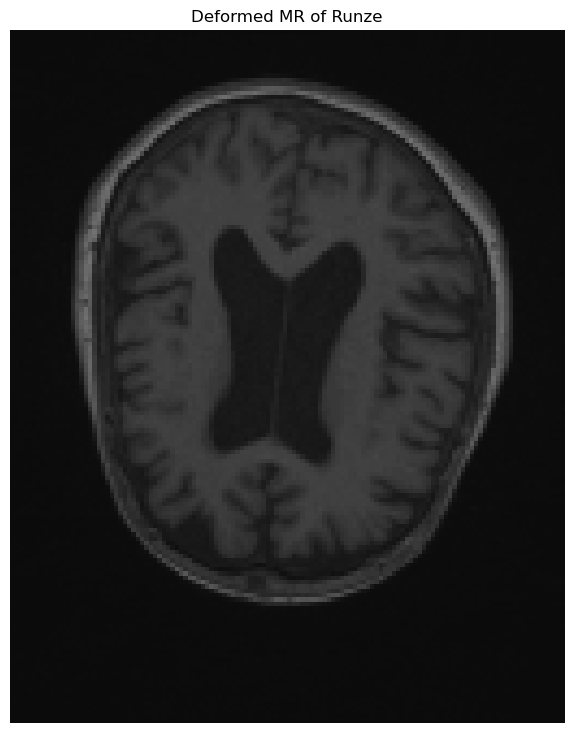

In [59]:
fig, ax = plt.subplots(1,1,figsize=(12,9))
np.vectorize(lambda ax: ax.axis('off'))(ax)

imx3 = ax.imshow(mr[0][:,:,islice].T, cmap='gray', vmin=0,vmax = 0.95)
ax.set_title('Deformed MR of Runze')

In [3]:
def extreme(train_path_r):
    maxlist = []
    minlist = []
    meanlist = []
    maxlist_v = []
    minlist_v = []
    meanlist_v = []
    for i in range(400):
        name = f'/{i:03}.npz'
        read = train_path_r+name
        data = np.load(read)['flow']
        # Convert the unit into mm from pixel
        data*=1.5
        flow = data[0,:,:,:]**2+data[1,:,:,:]**2+data[2,:,:,:]**2
        # if flow.max()>maxi:
        #     maxi = flow.max()**0.5
        # if flow.min()<mini:
        #     mini = flow.min()**0.5
        flow = flow**0.5
        maxlist.append(flow.max())
        minlist.append(flow.min())
        meanlist.append(flow.mean())
        maxlist_v.append(data.max())
        minlist_v.append(data.min())
        meanlist_v.append(data.mean())
    return maxlist,minlist,meanlist,maxlist_v,minlist_v,meanlist_v
        
        
    

In [4]:
def extremer(train_path_r):
    maxlist = []
    minlist = []
    meanlist = []       
    maxlist_v = []
    minlist_v = []
    meanlist_v = [] 
    for i in range(400):
        name = f'/{i:03}.npz'
        read = train_path_r+name
        data = np.load(read)['flow']
         # Convert the unit into mm from pixel
        data[0,:,:,:,0] *= 0.7
        data[0,:,:,:,1] *= 0.7
        flow = data[0,:,:,:,0]**2+data[0,:,:,:,1]**2+data[0,:,:,:,2]**2
        # if flow.max()>maxi:
        #     maxi = flow.max()**0.5
        # if flow.min()<mini:
        #     mini = flow.min()**0.5
        
        flow = flow**0.5
        maxlist.append(flow.max())
        minlist.append(flow.min())
        meanlist.append(flow.mean())
        maxlist_v.append(data.max())
        minlist_v.append(data.min())
        meanlist_v.append(data.mean())
    return maxlist,minlist,meanlist,maxlist_v,minlist_v,meanlist_v

In [5]:

maxlist2,minlist2,meanlist2,maxlist2_v,minlist2_v,meanlist2_v = extreme(train_path3)
maxlist3,minlist3,meanlist3,maxlist3_v,minlist3_v,meanlist3_v = extremer(train_path4)

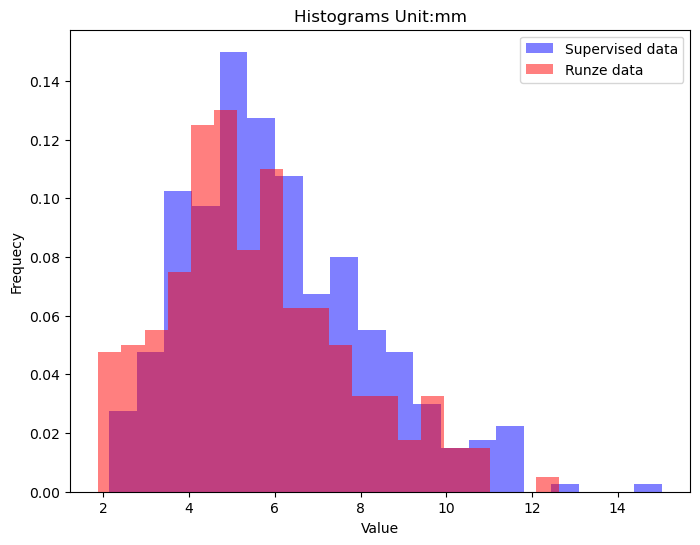

In [6]:
plt.figure(figsize=(8, 6))

# 绘制两组数据的直方图
plt.hist(maxlist2, bins=20, alpha=0.5, color='blue', label='Supervised data',weights = np.ones_like(maxlist2)/float(len(maxlist2)))
plt.hist(maxlist3, bins=20, alpha=0.5, color='red', label='Runze data',weights = np.ones_like(maxlist3)/float(len(maxlist3)))

# 添加标签和图例
plt.xlabel('Value')

plt.ylabel('Frequecy')
plt.title('Histograms Unit:mm')
plt.legend()

# 显示图形
plt.show()

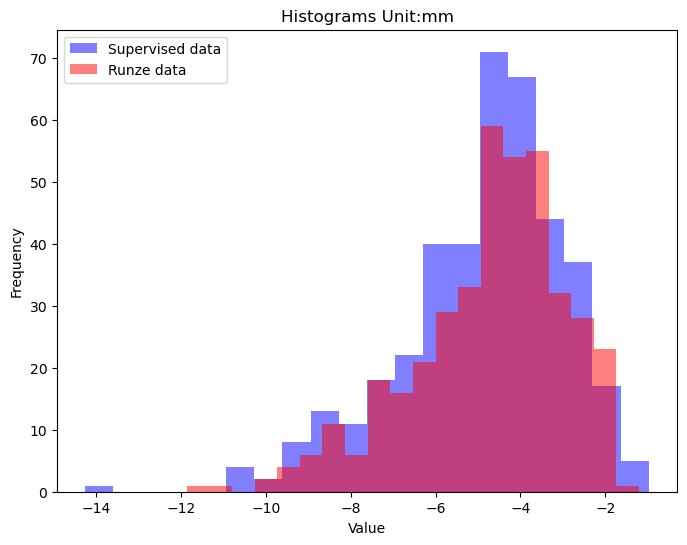

In [7]:
plt.figure(figsize=(8, 6))

# 绘制两组数据的直方图
plt.hist(minlist2_v, bins=20, alpha=0.5, color='blue', label='Supervised data')
plt.hist(minlist3_v, bins=20, alpha=0.5, color='red', label = 'Runze data')

# 添加标签和图例
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms Unit:mm')
plt.legend()

# 显示图形
plt.show()

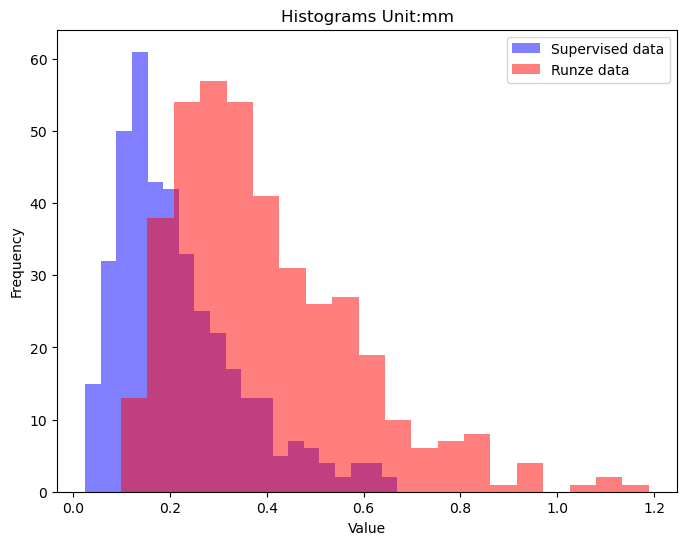

In [8]:
plt.figure(figsize=(8, 6))

# 绘制两组数据的直方图
plt.hist(meanlist2, bins=20, alpha=0.5, color='blue', label='Supervised data')
plt.hist(meanlist3, bins=20, alpha=0.5, color='red', label = 'Runze data')

# 添加标签和图例
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms Unit:mm')
plt.legend()

# 显示图形
plt.show()